In [41]:
#!/usr/bin/env python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from sklearn.datasets import fetch_openml
import umap
import umap.plot

First let's load our Fashion MNIST dataset.

In [35]:
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

Now lets use UMAP to learn our embedding space.

In [37]:
mapper = umap.UMAP(random_state=42,verbose=True).fit(data)

UMAP(random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon Aug  3 19:16:58 2020 Finding Nearest Neighbors
Mon Aug  3 19:16:58 2020 Building RP forest with 18 trees
Mon Aug  3 19:17:06 2020 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
Mon Aug  3 19:17:22 2020 Finished Nearest Neighbor Search
Mon Aug  3 19:17:24 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Aug  3 19:18:15 2020 Finished embedding


<AxesSubplot:>

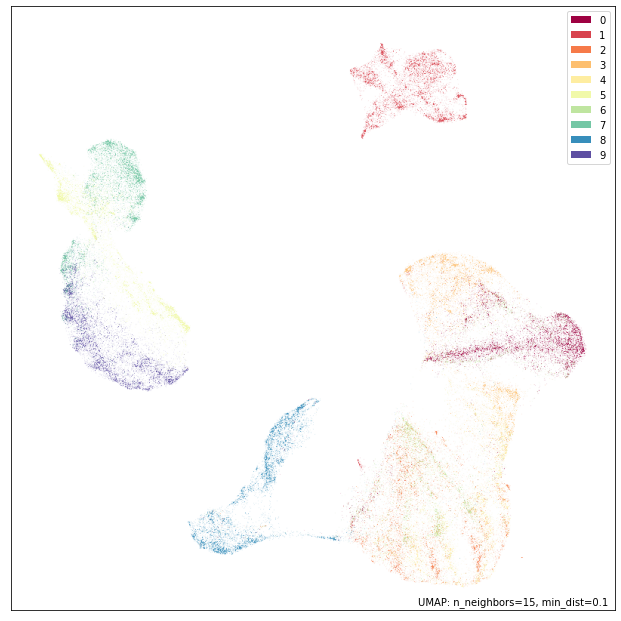

In [38]:
umap.plot.points(mapper, labels=labels)

In [49]:
corners = np.array([
    [2.5, -2.5],  # bags
    [-2, 9],  # boots?
    [13, -2.5],  # shirts/tops/dresses
    [10, 12],  # pants
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])


inv_transformed_points = trans.inverse_transform(test_pts)

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


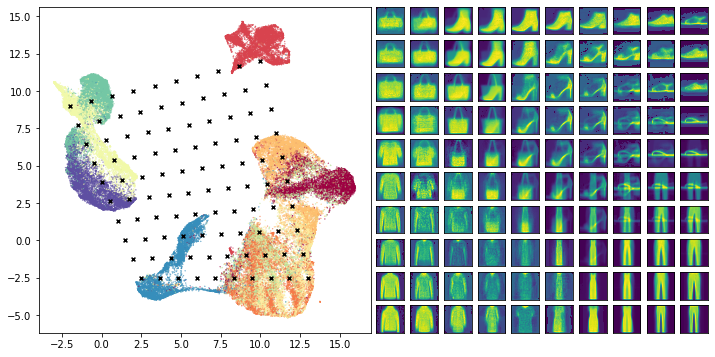

In [50]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
#scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])